### 벅스 뮤직 일간 차트 자료 크롤링
- 일자별 차트 크롤링
- 시작일부터 종료일까지 차트 내용 가져오기
- 기간내에 가장 많이 등장한 아티스트, 곡 확인 및 시각화
- 곡에 대한 순위 변동 확인 및 시각화


In [3]:
import requests 
from bs4 import BeautifulSoup as bs
import pandas as pd

#### 1) 1등만 가져오기

In [11]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="
url = url + str(20220323)

html = requests.get(url)
soup = bs(html.text , "html.parser")

bugs_day=[]
tbody = soup.find("tbody")
tr_soup = tbody.find_all("tr")
# tr_soup[0] -> 1등 정보
rank = tr_soup[0].find("div", class_="ranking").get_text().split("\n")[1] 
title = tr_soup[0].find("p", class_="title").get_text().replace("\n","")
art = tr_soup[0].find("p", class_="artist").get_text().replace("\n","")
album = tr_soup[0].find("a", class_="album").get_text().replace("\n","")

bugs_day.append([rank, title, art, album]) # 리스트안에 리스트로 넣어줘야해!

bugs_day

[['1', 'TOMBOY', '(여자)아이들', 'I NEVER DIE']]

#### 2) 전체순위 가져오기

In [12]:
url = "https://music.bugs.co.kr/chart/track/day/total?chartdate="
url = url + str(20220323)

html = requests.get(url)
soup = bs(html.text , "html.parser")

bugs_day=[]
tbody = soup.find("tbody")
tr_soup = tbody.find_all("tr")

for tr in tr_soup:
    rank = tr.find("div", class_="ranking").get_text().split("\n")[1] 
    title = tr.find("p", class_="title").get_text().replace("\n","")
    art = tr.find("p", class_="artist").get_text().replace("\n","")
    album = tr.find("a", class_="album").get_text().replace("\n","")

    bugs_day.append([rank, title, art, album]) # 리스트안에 리스트로 넣어줘야해!

#bugs_day
df = pd.DataFrame(bugs_day, columns=["순위", "곡명", "아티스트", "앨범"])
df

,순위,곡명,아티스트,앨범
0,1,TOMBOY,(여자)아이들,I NEVER DIE
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’
2,3,GANADARA (Feat. 아이유),박재범,GANADARA
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙)
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album
...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1
96,97,WA DA DA,Kep1er (케플러),FIRST IMPACT
97,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6
98,99,소주 한 잔,양다일,소주 한 잔


#### 3) 순위에 따른 점수 부여
- 1등: 100점 / 100등: 1점

In [14]:
# 정보 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   순위      100 non-null    object
 1   곡명      100 non-null    object
 2   아티스트    100 non-null    object
 3   앨범      100 non-null    object
dtypes: object(4)
memory usage: 3.2+ KB


In [23]:
score = []
for i in range(100):
    score.append(101-int(df.loc[i,"순위"])) # f.loc[i,1] : 순위
df["점수"] = score
df

,순위,곡명,아티스트,앨범,점수
0,1,TOMBOY,(여자)아이들,I NEVER DIE,100
1,2,Feel My Rhythm,Red Velvet (레드벨벳),‘The ReVe Festival 2022 - Feel My Rhythm’,99
2,3,GANADARA (Feat. 아이유),박재범,GANADARA,98
3,4,사랑인가 봐,멜로망스(MeloMance),사랑인가 봐 (사내맞선 OST 스페셜 트랙),97
4,5,INVU,태연 (TAEYEON),INVU - The 3rd Album,96
...,...,...,...,...,...
95,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1,5
96,97,WA DA DA,Kep1er (케플러),FIRST IMPACT,4
97,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6,3
98,99,소주 한 잔,양다일,소주 한 잔,2


In [ ]:
df["점수"] = [101-int(df.loc[i, "순위"])]

In [34]:
score_2 = sorted(list(range(1, 101), reverse=True)
               

SyntaxError: invalid syntax (1043562690.py, line 3)

#### [미션] 특정 기간내 순위 크롤링
- 시작일/종료일 => 사용자로부터 입력받아 진행
- 기간 전체 순위 가져오기 (2022-02-01~2022-03-23)
- 가져온 모든 데이터는 DataFrame()


In [41]:
### 시작일~종료일 날짜 생성하기

# pandas 이용 - 날짜 생성 
dates=pd.date_range("2022-02-01", "2022-03-23")
# 날짜 문자형 데이터로 바꾸기
dates=[i.strftime("%Y%m%d")for i in dates] 
print(dates)


['20220201', '20220202', '20220203', '20220204', '20220205', '20220206', '20220207', '20220208', '20220209', '20220210', '20220211', '20220212', '20220213', '20220214', '20220215', '20220216', '20220217', '20220218', '20220219', '20220220', '20220221', '20220222', '20220223', '20220224', '20220225', '20220226', '20220227', '20220228', '20220301', '20220302', '20220303', '20220304', '20220305', '20220306', '20220307', '20220308', '20220309', '20220310', '20220311', '20220312', '20220313', '20220314', '20220315', '20220316', '20220317', '20220318', '20220319', '20220320', '20220321', '20220322', '20220323']


In [50]:
!pip install tqdm

You should consider upgrading via the '/Users/hyunjinkim/opt/miniconda3/bin/python -m pip install --upgrade pip' command.


In [52]:

import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
#진행도 확인 패키지 tqdm -> for문에서 많이 쓰임 !
from tqdm import tqdm

# 사용자 입력: 시작일/종료일
sdt = input("시작일을 입력해 주세요.:")
edt = input("종료일을 입력해 주세요.:")

#dates=pd.date_range("2022-02-01", "2022-03-23")
dates=pd.date_range(sdt, edt)
dates=[i.strftime("%Y%m%d")for i in dates] 
#print(dates)

df_bugs = pd.DataFrame()

for date in tqdm(dates):
    url = "https://music.bugs.co.kr/chart/track/day/total?chartdate=" + str(date)
    
    html = requests.get(url)
    soup = bs(html.text , "html.parser")
    
    bugs_day=[] # for 문 밖에서 쓰여면 bugs_day.append->dic구로조 변경해줘야함
    tbody = soup.find("tbody")
    tr_soup = tbody.find_all("tr")
    
    
    scr = 101 # 점수 초기값 (1등:100점 시작 ~ for문 반복 통해 -1씩 감소)
    for tr in tr_soup:
        rank = tr.find("div", class_="ranking").get_text().split("\n")[1] 
        title = tr.find("p", class_="title").get_text().replace("\n","")
        art = tr.find("p", class_="artist").get_text().replace("\n","")
        album = tr.find("a", class_="album").get_text().replace("\n","")
        scr -= 1 # 1회 추출 -> -1씩 감소
        bugs_day.append([date, rank, title, art, album, scr]) # 리스트안에 리스트로 넣어줘야해!

    #bugs_day
    df = pd.DataFrame(bugs_day, columns=["날짜", "순위", "곡명", "아티스트", "앨범", "점수"])
    df_bugs = pd.concat([df_bugs, df])

#df_bugs.reset_index(drop=True, inlace=True) # 반복적으로 생성할 때마다 index 드롭
df_bugs = df_bugs.reset_index(drop=True)
df_bugs.info()

시작일을 입력해 주세요.:2022-02-01
종료일을 입력해 주세요.:2022-03-23


100%|███████████████████████████████████████████| 51/51 [00:20<00:00,  2.47it/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5100 non-null   object
 1   순위      5100 non-null   object
 2   곡명      5100 non-null   object
 3   아티스트    5100 non-null   object
 4   앨범      5100 non-null   object
 5   점수      5100 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 239.2+ KB


In [49]:
df_bugs.info()
df_bugs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5100 entries, 0 to 5099
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      5100 non-null   object
 1   순위      5100 non-null   object
 2   곡명      5100 non-null   object
 3   아티스트    5100 non-null   object
 4   앨범      5100 non-null   object
 5   점수      5100 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 239.2+ KB


,날짜,순위,곡명,아티스트,앨범,점수
0,20220201,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
1,20220201,2,ELEVEN,IVE (아이브),ELEVEN,99
2,20220201,3,Can't Control Myself,태연 (TAEYEON),Can't Control Myself,98
3,20220201,4,Step Back,GOT the beat,Step Back,97
4,20220201,5,Dreams Come True,aespa,Dreams Come True - SM STATION,96
...,...,...,...,...,...,...
5095,20220323,96,Diamonds (feat. 태용 of NCT),SURAN (수란),FLYIN' PART1,5
5096,20220323,97,WA DA DA,Kep1er (케플러),FIRST IMPACT,4
5097,20220323,98,Stardust love song,지효 (TWICE),스물다섯 스물하나 OST Part 6,3
5098,20220323,99,소주 한 잔,양다일,소주 한 잔,2


#### 특정 곡 조회 후 꺾은선 차트로 출력


In [53]:
df_bugs.head()

,날짜,순위,곡명,아티스트,앨범,점수
0,20220201,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
1,20220201,2,ELEVEN,IVE (아이브),ELEVEN,99
2,20220201,3,Can't Control Myself,태연 (TAEYEON),Can't Control Myself,98
3,20220201,4,Step Back,GOT the beat,Step Back,97
4,20220201,5,Dreams Come True,aespa,Dreams Come True - SM STATION,96


In [56]:
# 순위 = 1등 
df_bugs[df_bugs["순위"]=="1"].head()

,날짜,순위,곡명,아티스트,앨범,점수
0,20220201,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
100,20220202,1,SMILEY (Feat. BIBI),YENA (최예나),ˣ‿ˣ (SMiLEY),100
200,20220203,1,너 아니면 안돼,먼데이 키즈(Monday Kiz),너 아니면 안돼,100
300,20220204,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100
400,20220205,1,대낮에 한 이별,선예\r선예\r,대낮에 한 이별,100


In [67]:
# 아티스트별로 누가 제일 많은가?
df_at = df_bugs.groupby("아티스트")[["곡명"]].count() # "아티스트"별 "곡명" 기준 수
df_at_10 = df_at.sort_values("곡명", ascending=False) .head(20)# T: 오름차순 / F: 내림차순
df_at_10

,곡명
아티스트,
태연 (TAEYEON),364
아이유(IU),353
aespa,180
BE'O (비오),173
방탄소년단,153
TREASURE(트레저),118
김기태,117
비투비,113
이무진,107


In [78]:
df_at_10 = df_at_10.reset_index().head(10) # "아티스트"->필드로 지정
df_at_10

,index,아티스트,곡명
0,0,태연 (TAEYEON),364
1,1,아이유(IU),353
2,2,aespa,180
3,3,BE'O (비오),173
4,4,방탄소년단,153
5,5,TREASURE(트레저),118
6,6,김기태,117
7,7,비투비,113
8,8,이무진,107
9,9,AKMU(악뮤),95


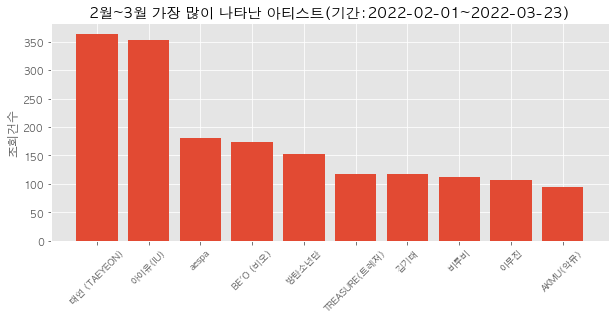

In [82]:
import matplotlib.pyplot as plt
import platform

# 시스템별 폰트 적용
if platform.system() == "Drawin":          # Mac 시스템
    plt.rc("font", family = "AppleGothic")
elif platform.system() == "Windows":       # Windows 시스템
    plt.rc("font", family = "Malgun Gothic")
elif platform.system() == "Linux":         # Linux 시스템 (코랩)
    plt.rc("font", family = "Malgun Gothic")
    
plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=45)
plt.style.use("ggplot")
plt.bar(df_at_10["아티스트"], df_at_10["곡명"])
plt.title(f"2월~3월 가장 많이 나타난 아티스트(기간:{sdt}~{edt})")
plt.ylabel("조회건수")          
plt.show()

### 가장 많이 나타난 아티스트의 노래의 조회 건수 

- 태연

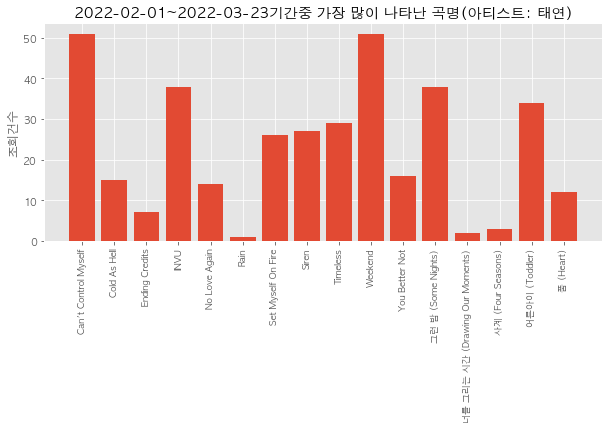

In [116]:
df_tae=df_bugs[df_bugs["아티스트"]=="태연 (TAEYEON)"]
df_tit = df_tae.groupby("곡명")[["아티스트"]].count() # "곡명" 기준 -"아티스트"

plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=90)
plt.style.use("ggplot")

plt.bar(df_tit.index, df_tit.아티스트) # = df_tit["아티스트"] 

plt.title(f"{sdt}~{edt}기간중 가장 많이 나타난 곡명(아티스트: 태연)")
plt.ylabel("조회건수")          
plt.show()

In [117]:
df_tit.sort_values("아티스트", ascending=False)

,아티스트
곡명,
Can't Control Myself,51
Weekend,51
INVU,38
그런 밤 (Some Nights),38
어른아이 (Toddler),34
Timeless,29
Siren,27
Set Myself On Fire,26
You Better Not,16


In [119]:
df_tae["곡명"].unique()

array(["Can't Control Myself", 'Weekend', 'INVU', '그런 밤 (Some Nights)',
       'Set Myself On Fire', '어른아이 (Toddler)', 'Siren', 'Timeless',
       '품 (Heart)', 'Cold As Hell', 'No Love Again', 'You Better Not',
       'Ending Credits', '사계 (Four Seasons)',
       '너를 그리는 시간 (Drawing Our Moments)', 'Rain'], dtype=object)

- 아이유

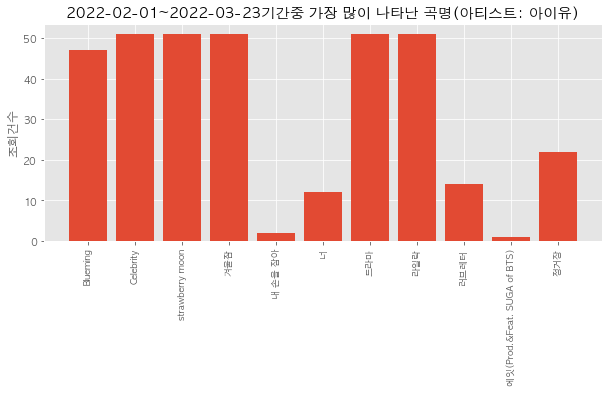

In [123]:
df_iu = df_bugs[df_bugs["아티스트"]=="아이유(IU)"]
df_tit = df_iu.groupby("곡명")[["아티스트"]].count() # "곡명" 기준 -"아티스트"

plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=90)
plt.style.use("ggplot")

plt.bar(df_tit.index, df_tit.아티스트) # = df_tit["아티스트"] 

plt.title(f"{sdt}~{edt}기간중 가장 많이 나타난 곡명(아티스트: 아이유)")
plt.ylabel("조회건수")          
plt.show()


In [124]:
df_iu["곡명"].unique()

array(['드라마', '겨울잠', 'strawberry moon', 'Celebrity', '정거장', '라일락', '러브레터',
       '너', 'Blueming', '에잇(Prod.&Feat. SUGA of BTS)', '내 손을 잡아'],
      dtype=object)

- 태연 - 'Weekend' 와  아이유 - '드라마' 비교 그래프

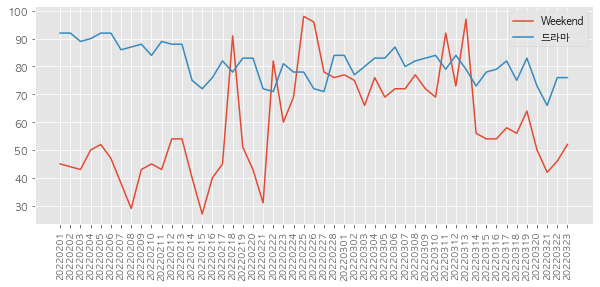

In [120]:
# 아티스트 - 곡명
df_weekend = df_bugs[df_bugs["곡명"]=="Weekend"] # 태연 - Weekend
df_drama = df_bugs[df_bugs["곡명"]=="드라마"]      # 아이유 - 드라마

plt.style.use("ggplot")
plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=90)

# x축, y축 기준
plt.plot(df_weekend.날짜, df_weekend.점수, label= "Weekend") 
plt.plot(df_drama.날짜, df_drama.점수, label= "드라마")

plt.legend() # 범례
plt.show()

### [미션]  
### 1. 아티스트(아이유)의 곡들에 대한 일자별 순위 변화 차트  
- 곡 하나당 차트 하나


In [162]:
iu_unq = df_iu["곡명"].unique()
iu_unq

array(['드라마', '겨울잠', 'strawberry moon', 'Celebrity', '정거장', '라일락', '러브레터',
       '너', 'Blueming', '에잇(Prod.&Feat. SUGA of BTS)', '내 손을 잡아'],
      dtype=object)

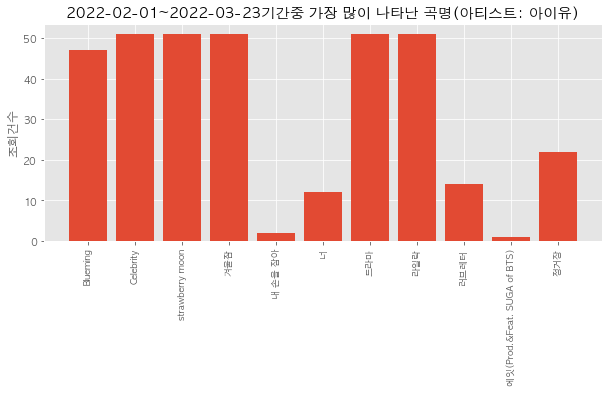

In [129]:
df_iu = df_bugs[df_bugs["아티스트"]=="아이유(IU)"]
df_tit = df_iu.groupby("곡명")[["아티스트"]].count() # "곡명" 기준 -"아티스트"

plt.figure(figsize=(10,4))
plt.xticks(size=9, rotation=90)
plt.style.use("ggplot")

plt.bar(df_tit.index, df_tit.아티스트) # = df_tit["아티스트"] 

plt.title(f"{sdt}~{edt}기간중 가장 많이 나타난 곡명(아티스트: 아이유)")
plt.ylabel("조회건수")          
plt.show()


In [135]:
iu_unq

array(['드라마', '겨울잠', 'strawberry moon', 'Celebrity', '정거장', '라일락', '러브레터',
       '너', 'Blueming', '에잇(Prod.&Feat. SUGA of BTS)', '내 손을 잡아'],
      dtype=object)

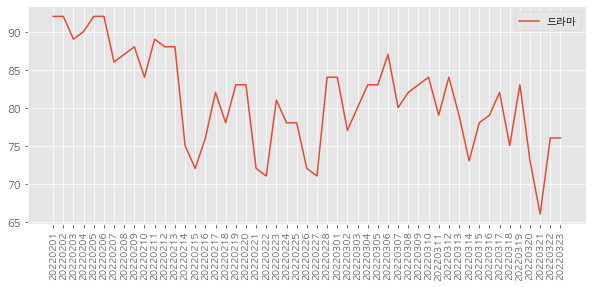

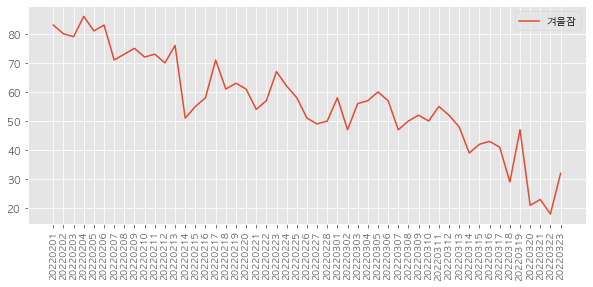

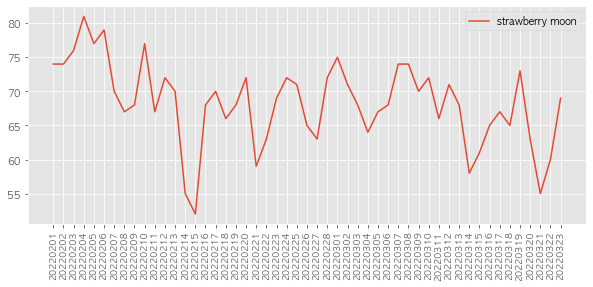

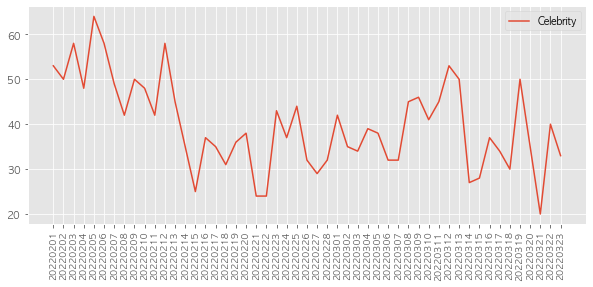

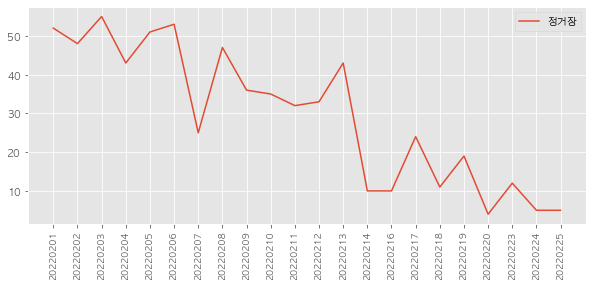

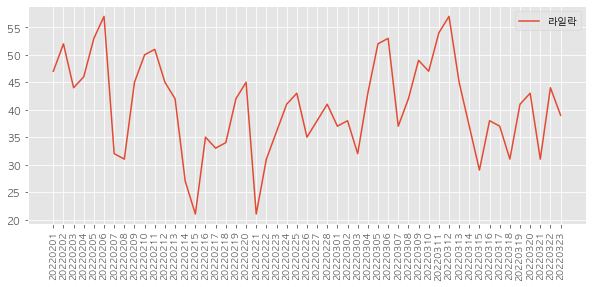

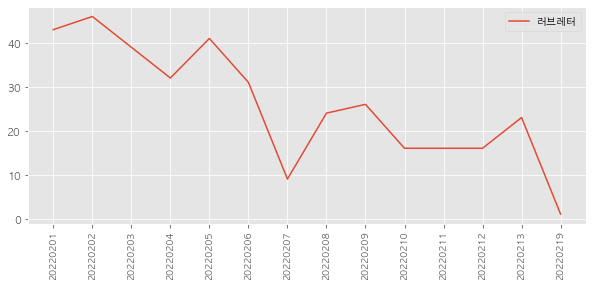

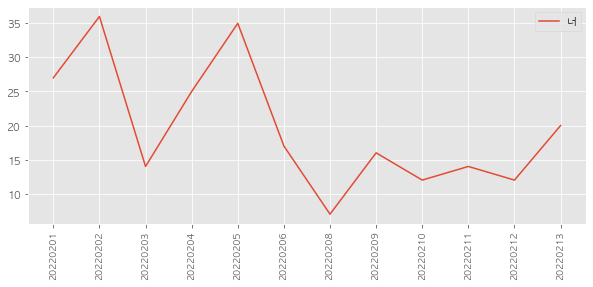

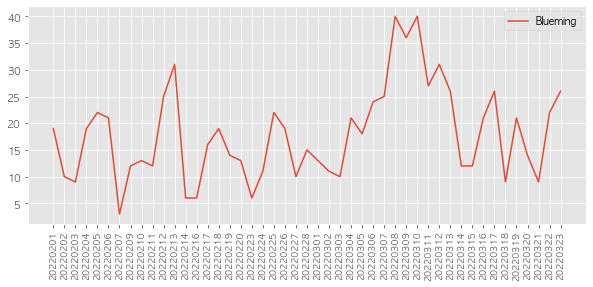

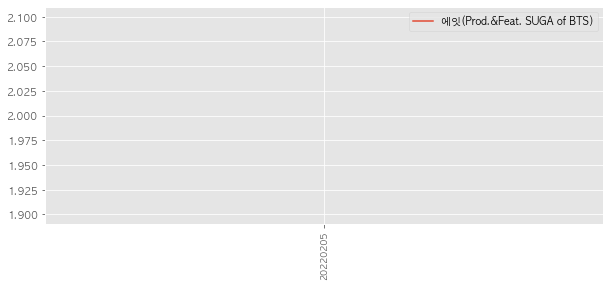

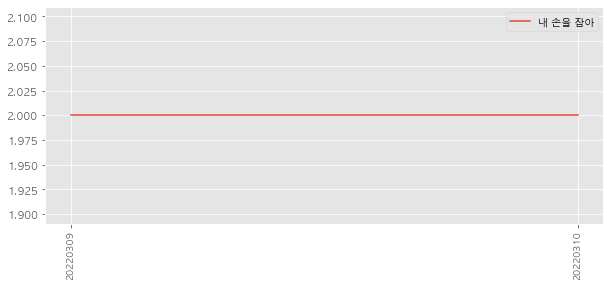

In [170]:
## 강사님 코드 (내 코드에 맞게 변수 변형)

# for문 안에 모든것 넣어버려
# 하나씩 반복하면서 출력! (하나 출력-> 하나 출력)

for i in iu_unq:
    df_u = df_bugs[df_bugs["곡명"]== i] 
    df_songs = pd.concat([df_songs, df_u])
    unq1 = unq.append(i)
    plt.figure(figsize=(10,4))
    plt.plot(df_u.날짜, df_u.점수, label= i) 
    plt.legend() 
    
    #plt.plot(df_u.날짜, df_u.점수, label= f"{unq}")    
    plt.style.use("ggplot")
    #plt.figure(figsize=(16,4))
    plt.xticks(size=9, rotation=90)
    plt.show()

### [미션]  
### 2. 아티스트(아이유)와 곡명을 입력받아 순위 변화 그래프 
- 차트 하나에 모든 곡 표현

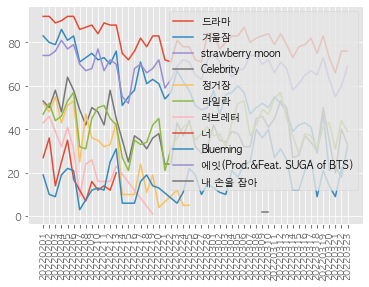

In [160]:
## 내가 만든 코드 >_<

df_songs = pd.DataFrame()
unq=[]
for i in iu_unq:
    df_u = df_bugs[df_bugs["곡명"]== i] 
    df_songs = pd.concat([df_songs, df_u])
    unq1 = unq.append(i)
    #plt.figure(figsize=(10,4))
    plt.plot(df_u.날짜, df_u.점수, label= i) 
    plt.legend() 
    
#plt.plot(df_u.날짜, df_u.점수, label= f"{unq}")    
plt.style.use("ggplot")
#plt.figure(figsize=(16,4))
plt.xticks(size=9, rotation=90)
plt.show()

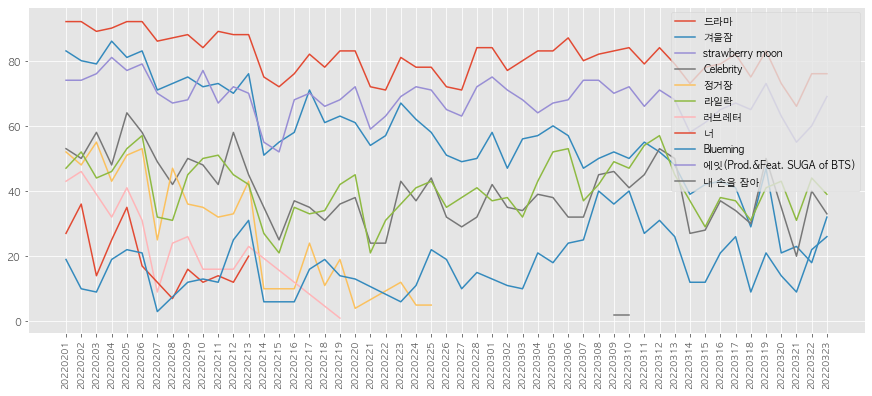

In [169]:
## 강사님 코드  (내 코드에 맞게 변수 변형함)

# 먼저 스타일 지정해주고 
# for문으로 반복 
# plt.legend() / plt.show()


plt.style.use('ggplot')

plt.figure(figsize=(15, 6))
plt.xticks(size=9, rotation=90)

for i in iu_unq:
    df_u = df_bugs[df_bugs["곡명"]== i] 
    plt.plot(df_u.날짜, df_u.점수, label= i)

plt.legend()
plt.show()

In [171]:
# csv 파일로 같은 디렉토리 안에 'bugo_' 이름으로 저장
df_bugs.to_csv("./bugo_")